In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files

In [2]:
!pip install nltk

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, RegexpStemmer, WordNetLemmatizer
from textblob import TextBlob

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [6]:
"""
DataFrame structure for the program
Columns:
Label( 0-Neutral(non-hate); 1-Hate )
Tweets
Tweet_P (Tweet after preprocessing)

"""

'\nDataFrame structure for the program\nColumns:\nLabel( 0-Neutral(non-hate); 1-Hate )\nTweets\nTweet_P (Tweet after preprocessing)\n\n'

""""Preprocessing for data from source 1"""

In [7]:
Data_1 = pd.read_csv('/content/Data_Source_1.csv')

In [8]:
Data_1.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
20797,21248,3,1,2,0,1,Shoot you and your shorty bitch
2667,2730,3,0,3,0,1,@BraveConWarrior She is a bitch ! This mess is...
15685,16052,3,0,3,0,1,RT @Its_NydiaMarie: Fuck your bitch make her c...
20712,21161,3,0,3,0,1,"She actin like a hoe i dont want her, id rathe..."
722,733,6,1,5,0,1,#IHopeSomeday that these hoes just find their ...


In [9]:
Data_1.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [10]:
Data_1 = Data_1.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'])

In [11]:
Data_1.rename(columns={'class': 'Label', 'tweet': 'Tweet'}, inplace=True)

In [12]:
Data_1.sample(5)

,Label,Tweet
2880,1,@Coley_Cee bitch watch tf out u on moose meat now
3826,1,@KimberlyyAye speaking of little bitch you did...
4901,1,@ThatSlutAdrian bitch those are the same options
3939,1,@LittleNamms stick to the court hoe
13452,2,Not sure why #teabaggers would care about Nels...


In [13]:
#class label: 0 - hate speech 1 - offensive language 2 - neither
#Convert to required columns

Data_1.loc[Data_1['Label']==0, 'Label'] = 1
Data_1.loc[Data_1['Label']==2, 'Label'] = 0

In [14]:
print(Data_1.isna().sum())
print(Data_1.shape)

Label    0
Tweet    0
dtype: int64
(24783, 2)


In [15]:
#Casefold to convert to lower case
Data_1['Tweet_P'] = Data_1.Tweet.str.casefold()

In [16]:
#Remove character except letter or space
remove = string.printable.replace(string.ascii_letters, '').replace(' ', '')
table = str.maketrans(remove, ' '*len(remove))
Data_1['Tweet_P'] = Data_1.Tweet_P.str.translate(table)

In [17]:
"""
#Spelling correction if required
def correct_spell(tweet):
  tweets = TextBlob(tweet)
  correct_tweets = tweets.correct()
  return str(correct_tweets)

Data_1['Tweet_P'] = Data_1['Tweet_P'].apply(correct_spell)
"""

"\n#Spelling correction if required\ndef correct_spell(tweet):\n  tweets = TextBlob(tweet)\n  correct_tweets = tweets.correct()\n  return str(correct_tweets)\n\nData_1['Tweet_P'] = Data_1['Tweet_P'].apply(correct_spell)\n"

In [18]:
#Remove stop word
stop_words = set(stopwords.words('english'))
def remove_stopwords(tweet):
  words = word_tokenize(tweet)
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

Data_1['Tweet_P'] = Data_1['Tweet_P'].apply(remove_stopwords)

In [19]:
#Applying Stemming
p_stem = PorterStemmer()
def p_stemming(tweet):
  words = word_tokenize(tweet)
  stemmed_words = [p_stem.stem(word) for word in words]
  return ' '.join(stemmed_words)

r_stem = RegexpStemmer('ing$|s$|e$|able$', min=4)
def r_stemming(tweet):
  words = word_tokenize(tweet)
  stemmed_words = [r_stem.stem(word) for word in words]
  return ' '.join(stemmed_words)

Data_1['Tweet_P'] = Data_1['Tweet_P'].apply(p_stemming)
Data_1['Tweet_P'] = Data_1['Tweet_P'].apply(r_stemming)

In [20]:
#Applying Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatizing(tweet):
  words = word_tokenize(tweet)
  lemmatized_word = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_word)

Data_1['Tweet_P'] = Data_1['Tweet_P'].apply(lemmatizing)

In [22]:
# Download preprocessed file for further use
DataP_1=pd.DataFrame(Data_1)
DataP_1.to_csv('DataP_1.csv', index=False)
DataP_1.head()
files.download('DataP_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
#Splitting data into train-test
vectorizer_1 = TfidfVectorizer()
T1 = vectorizer_1.fit_transform(Data_1['Tweet_P'])

joblib.dump(vectorizer_1, 'tfidf_vectorizer_1.pkl')

L1 = Data_1['Label']
T1_train, T1_test, L1_train, L1_test = train_test_split(T1, L1, test_size=0.2, random_state=42)
print(T1_train.shape, T1_test.shape, L1_train.shape, L1_test.shape)

(19826, 29983) (4957, 29983) (19826,) (4957,)


"""Preprocessing of data from source 2"""

In [24]:
Data_2 = pd.read_csv('/content/Data_Source_2.csv')

In [25]:
Data_2.sample(5)

,id,label,tweet
3179,3180,0,its friday! ððð happy children are th...
28595,28596,0,"do not wait for leaders; do it alone, person t..."
14066,14067,0,we sure are
29392,29393,0,@user @user obama just cleared the cow path o...
1955,1956,0,#streetautopia attack bull game 3d: do you r...


In [26]:
print(Data_2.columns)
Data_2 = Data_2.drop(columns=['id'])
Data_2.rename(columns={'label': 'Label', 'tweet': 'Tweet'}, inplace=True)
print(Data_2.isna().sum())
print(Data_2.shape)

Index(['id', 'label', 'tweet'], dtype='object')
Label    0
Tweet    0
dtype: int64
(31962, 2)


In [27]:
Data_2['Tweet_P'] = Data_2.Tweet.str.casefold()
remove = string.printable.replace(string.ascii_letters, '').replace(' ', '')
table = str.maketrans(remove, ' '*len(remove))
Data_2['Tweet_P'] = Data_2.Tweet_P.str.translate(table)
Data_2['Tweet_P'] = Data_2['Tweet_P'].apply(remove_stopwords)
Data_2['Tweet_P'] = Data_2['Tweet_P'].apply(p_stemming)
Data_2['Tweet_P'] = Data_2['Tweet_P'].apply(r_stemming)
Data_2['Tweet_P'] = Data_2['Tweet_P'].apply(lemmatizing)

In [29]:
DataP_2=pd.DataFrame(Data_2)
DataP_2.to_csv('DataP_2.csv', index=False)
DataP_2.head()
files.download('DataP_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
T2 = Data_2['Tweet_P']
L2 = Data_2['Label']
T2_train, T2_test, L2_train, L2_test = train_test_split(T2, L2, test_size=0.2, random_state=42)
print(T2_train.shape, T2_test.shape, L2_train.shape, L2_test.shape)

(25569,) (6393,) (25569,) (6393,)


"""Preprocessing of data from source 3"""

In [31]:
Data_3 = pd.read_csv('/content/Data_Source_3.csv')

In [32]:
Data_3.sample(5)

,Unnamed: 0,Toxicity,tweet
29080,29080,1,fo woh pastors say officer's acts in viral vid...
31753,31753,0,#orlandonightclubshooting #rip #ripchristina...
24424,24424,0,"@user ""he who avoids complaint invites happin..."
31038,31038,0,cue the violins #sososad
40793,40793,1,Don't you hate that dumb ass voice that everyo...


In [33]:
print(Data_3.columns)
Data_3 = Data_3.drop(columns=['Unnamed: 0'])
Data_3.rename(columns={'Toxicity': 'Label', 'tweet': 'Tweet'}, inplace=True)
print(Data_3.isna().sum())
print(Data_3.shape)

Index(['Unnamed: 0', 'Toxicity', 'tweet'], dtype='object')
Label    0
Tweet    0
dtype: int64
(56745, 2)


In [34]:
Data_3['Tweet_P'] = Data_3.Tweet.str.casefold()
remove = string.printable.replace(string.ascii_letters, '').replace(' ', '')
table = str.maketrans(remove, ' '*len(remove))
Data_3['Tweet_P'] = Data_3.Tweet_P.str.translate(table)
Data_3['Tweet_P'] = Data_3['Tweet_P'].apply(remove_stopwords)
Data_3['Tweet_P'] = Data_3['Tweet_P'].apply(p_stemming)
Data_3['Tweet_P'] = Data_3['Tweet_P'].apply(r_stemming)
Data_3['Tweet_P'] = Data_3['Tweet_P'].apply(lemmatizing)

In [36]:
DataP_3=pd.DataFrame(Data_3)
DataP_3.to_csv('DataP_3.csv', index=False)
DataP_3.head()
files.download('DataP_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
T3 = Data_3['Tweet_P']
L3 = Data_3['Label']
T3_train, T3_test, L3_train, L3_test = train_test_split(T3, L3, test_size=0.2, random_state=42)
print(T3_train.shape, T3_test.shape, L3_train.shape, L3_test.shape)

(45396,) (11349,) (45396,) (11349,)


In [38]:
"""
Using Logistic regression model
Model is fit on one data source & check accuracy for different data sources
"""

'\nUsing Logistic regression model\nModel is fit on one data source & check accuracy for different data sources\n'

In [39]:
#Logistic Regression Model
model_1 = LogisticRegression()
model_1.fit(T1_train, L1_train)

LogisticRegression()

In [40]:
joblib.dump(model_1, 'logistic_regression_model_1.pkl')

['logistic_regression_model_1.pkl']

In [41]:
model_1 = joblib.load('logistic_regression_model_1.pkl')

In [42]:
L1_predicted = model_1.predict(T1_test)
print("Model trained on Data Source 1 & Tested on Data Source 1")
print("Accuracy Score 1: \n", accuracy_score(L1_test, L1_predicted))
print("Confusion Matrix: \n", confusion_matrix(L1_test, L1_predicted))
print("Classification Report: \n", classification_report(L1_test, L1_predicted))

Model trained on Data Source 1 & Tested on Data Source 1
Accuracy Score 1: 
 0.9352430905789793
Confusion Matrix: 
 [[ 599  236]
 [  85 4037]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       835
           1       0.94      0.98      0.96      4122

    accuracy                           0.94      4957
   macro avg       0.91      0.85      0.88      4957
weighted avg       0.93      0.94      0.93      4957



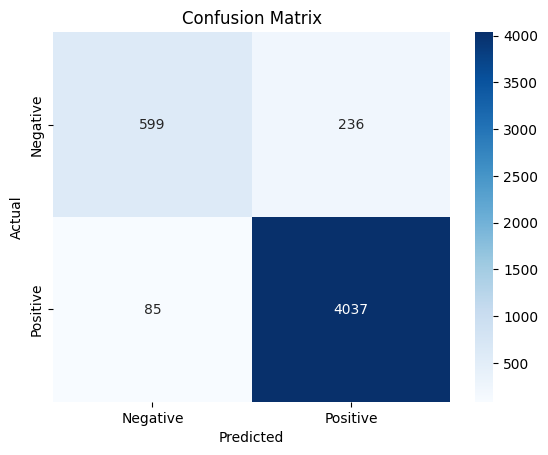

In [43]:
sns.heatmap(confusion_matrix(L1_test, L1_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [44]:
vectorizer_1 = joblib.load('tfidf_vectorizer_1.pkl')
T2_test = vectorizer_1.transform(T2_test)
model_1 = joblib.load('logistic_regression_model_1.pkl')
L2_predicted = model_1.predict(T2_test)
print("Model trained on Data Source 1 & Tested on Data Source 2")
print("Accuracy Score 1: \n", accuracy_score(L2_test, L2_predicted))
print("Confusion Matrix: \n", confusion_matrix(L2_test, L2_predicted))
print("Classification Report: \n", classification_report(L2_test, L2_predicted))

Model trained on Data Source 1 & Tested on Data Source 2
Accuracy Score 1: 
 0.17675582668543718
Confusion Matrix: 
 [[ 701 5236]
 [  27  429]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.12      0.21      5937
           1       0.08      0.94      0.14       456

    accuracy                           0.18      6393
   macro avg       0.52      0.53      0.18      6393
weighted avg       0.90      0.18      0.21      6393



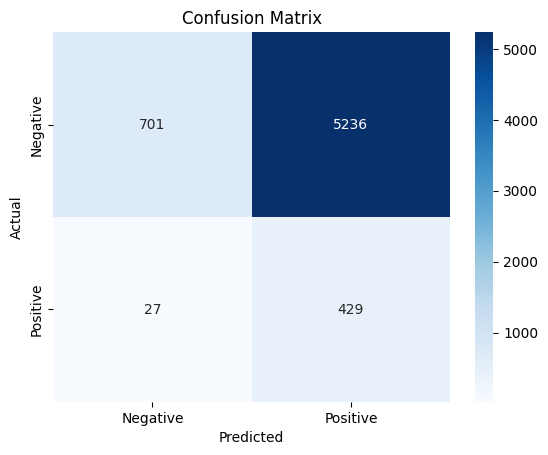

In [45]:
sns.heatmap(confusion_matrix(L2_test, L2_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
vectorizer_1 = joblib.load('tfidf_vectorizer_1.pkl')
T3_test = vectorizer_1.transform(T3_test)
model_1 = joblib.load('logistic_regression_model_1.pkl')
L3_predicted = model_1.predict(T3_test)
print("Model trained on Data Source 1 & Tested on Data Source 3")
print("Accuracy Score 1: \n", accuracy_score(L3_test, L3_predicted))
print("Confusion Matrix: \n", confusion_matrix(L3_test, L3_predicted))
print("Classification Report: \n", classification_report(L3_test, L3_predicted))

Model trained on Data Source 1 & Tested on Data Source 3
Accuracy Score 1: 
 0.514406555643669
Confusion Matrix: 
 [[1226 5246]
 [ 265 4612]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.19      0.31      6472
           1       0.47      0.95      0.63      4877

    accuracy                           0.51     11349
   macro avg       0.65      0.57      0.47     11349
weighted avg       0.67      0.51      0.44     11349



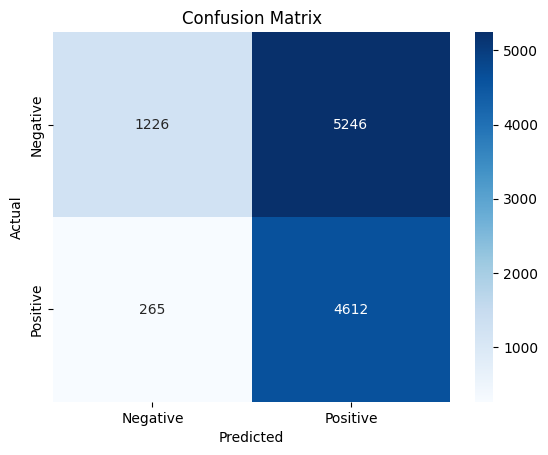

In [47]:
sns.heatmap(confusion_matrix(L3_test, L3_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()